In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
import graphviz 

In [2]:
data=pd.read_csv("Buy_Computer.csv")
data

,id,age,income,student,credit_rating,Buy_Computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_age,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_age,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [3]:
data=data.drop(["id"],axis=1)
data

,age,income,student,credit_rating,Buy_Computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_age,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [4]:
X=data.iloc[:,:4]
y=data.iloc[:,4]
print(X)
print(y)

           age  income student credit_rating
0        youth    high      no          fair
1        youth    high      no     excellent
2   middle_age    high      no          fair
3       senior  medium      no          fair
4       senior     low     yes          fair
5       senior     low     yes     excellent
6   middle_age     low     yes     excellent
7        youth  medium      no          fair
8        youth     low     yes          fair
9       senior  medium     yes          fair
10       youth  medium     yes     excellent
11  middle_age  medium      no     excellent
12  middle_age    high     yes          fair
13      senior  medium      no     excellent
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Buy_Computer, dtype: object


In [5]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [12]:
data['Buy_Computer'].replace('yes','1', inplace=True)
data['Buy_Computer'].replace('no','0', inplace=True)

data['age'].replace('youth','0', inplace=True)
data['age'].replace('middle_age','1', inplace=True)
data['age'].replace('senior','2', inplace=True)

data['student'].replace('no','0', inplace=True)
data['student'].replace('yes','1', inplace=True)

data['credit_rating'].replace('fair','0', inplace=True)
data['credit_rating'].replace('excellent','1', inplace=True)

data['income'].replace('low','0', inplace=True)
data['income'].replace('medium','1', inplace=True)
data['income'].replace('high','2', inplace=True)

data

,age,income,student,credit_rating,Buy_Computer
0,0,2,0,0,0
1,0,2,0,1,0
2,1,2,0,0,1
3,2,1,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,1,0,1,1,1
7,0,1,0,0,0
8,0,0,1,0,1
9,2,1,1,0,1


In [13]:
X=data.iloc[:,:4]
y=data.iloc[:,4]
print(X)
print(y)

   age income student credit_rating
0    0      2       0             0
1    0      2       0             1
2    1      2       0             0
3    2      1       0             0
4    2      0       1             0
5    2      0       1             1
6    1      0       1             1
7    0      1       0             0
8    0      0       1             0
9    2      1       1             0
10   0      1       1             1
11   1      1       0             1
12   1      2       1             0
13   2      1       0             1
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Buy_Computer, dtype: object


[Text(0.4444444444444444, 0.9, 'X[2] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'X[0] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.5, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'X[3] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples

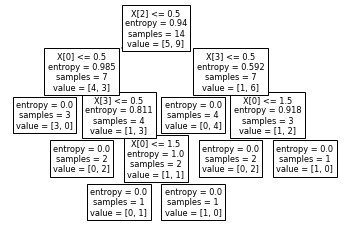

In [15]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(X,y)
tree.plot_tree(clf)

[Text(0.4444444444444444, 0.9, 'X[2] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'X[3] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888

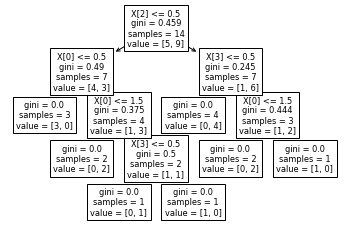

In [17]:
clf = tree.DecisionTreeClassifier()
clf=clf.fit(X,y)
tree.plot_tree(clf)